<h2><center>
UNIVERSIDADE FEDERAL FLUMINENSE <br>
PROGRAMA DE PÓS-GRADUÇÃO EM COMPUTAÇÃO <br>
ESTIMAÇÃO DE ESTADO</center></h2>

Luiz Phillip Quintanilha da Silva

Neste relatório será apresentado o usa da aplicação desenvolvida para a Estimação de Estado (EE). O programa contém as principais ferramentas estudadas na disciplina de EE ministrada pelo professor Julio Cesar Stacchini De Souza no segundo semestre de 2020. O progama foi testado no sistema do IEEE 14 Barras para sistemas de transmissão.

A Estimação de Estado é um processo iterativo em que dado um conjuto de medições instaladas um valor e designado para as variáveis de estado do sistema com base em algum critério. Como os erros são inerentes ao processo de medição a redundância torna-se necessária. Na EE para sistemas elétricos de potência é usual minimizar a função de custo conhecida como Mínimos Quadrados Ponderados. 

<h2> Mínimos Quadrados Ponderados </h2>

Conforme mencionado anteriormente a função que se deseja minimizar para a EE é a Mínimos Quadrados Ponderados. Esta função, designada pela letra $J$ está representada na Equação (1)
### $$J(x) = \sum_{i=1}^{N} \frac{(z_{i} - h_{i}(x))^2}{R_{ii}} \quad (1)$$
onde $z_{i}$ representa o valor medido, $h_{i}$ é uma função não linear que relaciona o estado estimado $x$ com a medida e $R_{ii}$ representa a variância da medida.

A Equação (1) difere dos mínimos quadrados comum por considerar a variância da medição. Esta função é considerada uma função de maximização da verossimilhança quando avaliada sobre uma distribuição normal.

É interessante notar que $J(x) \sim \tilde{\chi}^2$. Desta forma, pode-se avaliar a qualidade da EE a partir de um teste de hipótese. Se ao final da estimação a função de custo está acima do valor da $\tilde{\chi}^2$ para um nível de confiança $\alpha$, então pode-se investigar a presença de dados errôneos ou de erro(s) no(s) parâmetros/topologia da rede. Vale ressaltar que em geral este método não é muito utilizado.

<h2> Processo de Estimação de Estado </h2>

A EE utiliza as medições disponíveis no sistema para estimar as variáveis de estado mais prováveis da rede. Este processo utiliza a Equação (1) para maximizar a verossimilhança entre as medições recebidas e as estimadas. Para tal tarefa defini-se uma função $g(x)$ que será responsável pela minimização de $J(x)$. Para esta minimização $g(x)$ será dada por:

 ### $$ g(x) = \frac{\partial J}{\partial x} = -H(x)^{T}R^{-1}[z - h(x)] \quad (2)$$

em que $H(x) = \frac{\partial h}{\partial x}$

Expandindo $g(x)$ em série de Taylor e considerando somente o termo de primeira ordem obtêm-se a Equação (3):

 ### $$[G(x^k)]\Delta x^{k+1} = H^{T}(x^{k})R^{-1}[z - h(x^{k})] \quad (3)$$

em que $G(x)$ é conhecida como matriz de ganho e definida como $G(x) = \frac{\partial g}{\partial x}$

Por ser um processo iterativo, o estado estimado é determinado quando $|\Delta x|$ é menor que uma tolerância determinada. Neste caso é dito que o processo convergiu. A Equação (4) apresenta esse critério de parada.

 ### $$\left\lvert \Delta x^{k} \right\rvert \leqslant \epsilon \quad (4)$$

<h2> Criticalidade - Medidas e Conjuntos </h2>

As medidas críticas e os conjuntos críticos podem ser obtidos a partir do EE linear. A criticalidade é um problema de característica topológica, então os valores das medidas e das admitâncias não são necessários. A principal característica das medidas críticas é que tanto o resíduo da estimação quanto o desvio padrão são iguais a zero. Desta forma, não é possível identificar erros presentes nas medidas críticas, além disso caso esta medida torne-se indisponível o sistema será dito não observável. Já as medidas pertencentes aos conjuntos críticos possuem tanto correlação máxima entre os resíduos quanto igualdade entre os resíduos normalizados. Neste caso, é possível detectar a presença de medidas errôneas, porém a identificação não pode ser realizada.

Outra característica que vale ressaltar é que quando se perde uma medida pertencente a algum conjunto crítico, todas as medidas daquele conjuto tornam-se críticas.

Em resumo, para a identificação das medidas críticas e dos conjuntos críticos:
* Medidas Críticas:
$$ r_{i} = r_{i}^N = 0$$
* Conjuntos Críticos:
$$ \rho = \frac{r_{i}^N}{r_{k}^N} = 1$$
$$ \gamma = \frac{|E_{ik}|}{\sqrt{E_{i}}\sqrt{E_{k}}} = 1$$

<h2> Bibliotecas e Funções </h2>

* Pandas - Biblioteca padrão do python para trabalhar com dados tabulares
* Numpy  - Biblioteca padrão do python para trabalhar com dados numéricos
* Matplotlib  - Biblioteca padrão do python para trabalhar com gráficos
* PSSS  - Função criada para o processo da Estimação de Estado

In [1]:
from PSSS import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Parâmetros das Linhas da rede teste

In [22]:
line_params = 'Dados_linha_XIV_barras.xlsx'
pd.read_excel(line_params)

,De,Para,R,X,C,Tap
0,1,2,0.019,0.059,18.939,0
1,1,5,0.054,0.223,20.325,0
2,2,3,0.047,0.198,22.831,0
3,2,4,0.058,0.176,26.738,0
4,2,5,0.057,0.174,29.412,0
5,3,4,0.067,0.171,28.902,0
6,4,5,0.013,0.042,78.125,0
7,4,7,0.000,0.209,0.000,0
8,4,9,0.000,0.556,0.000,0
9,5,6,0.000,0.252,0.000,0


Medições disponíveis na rede

In [23]:
meansured_file = 'Meansured_data_XIV_bus.xlsx'
pd.read_excel(meansured_file)

,Tipo,De,Para,Valor,Desvio_Pad
0,P,1,-,1.266,0.016
1,P,2,-,0.156,0.012
2,P,2,1,-0.861,0.017
3,P,1,5,0.435,0.014
4,P,2,3,0.463,0.015
5,P,2,4,0.341,0.014
6,P,5,2,-0.244,0.013
7,P,3,4,-0.198,0.013
8,P,4,5,-0.388,0.014
9,P,7,4,-0.208,0.013


Executando a função state_estimation(). Esta função retorna:
* y_bus_matrix - Matriz Y Barra do sistema
* criticality_data - Dados Relacionados a Criticalidade das medidas
* J_list - Função de custo ao longo do processo iterativo
* J_critical - Valor crítico da função de custo
* State_dataframe - Dados do Estado estimado com as medidas disponíveis
* data_SE - Dados Relacionados as medidas estimadas 

In [24]:
y_bus_matrix, criticality_data, J_list, J_critical, State_dataframe, data_SE = state_estimation(line_params = line_params, meansured_file = meansured_file)

Visualização da Matriz $Y_{bus}$ obtida pelo programa state_estimation
## $$Y_{bus} = Z_{bus}^{-1}$$

In [25]:
amount_bus = y_bus_matrix.shape[0]
bus = range(1, amount_bus+1)
pd.DataFrame(y_bus_matrix, index = bus, columns = bus).style.format("{:,.1f}".format).set_properties(**{'font-size': '8pt'})

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,6.0-19.4j,-5.0+15.3j,0.0+0.0j,0.0+0.0j,-1.0+4.2j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
2,-5.0+15.3j,9.5-30.3j,-1.1+4.8j,-1.7+5.1j,-1.7+5.2j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
3,0.0+0.0j,-1.1+4.8j,3.1-9.8j,-2.0+5.1j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
4,0.0+0.0j,-1.7+5.1j,-2.0+5.1j,10.5-38.3j,-6.8+21.6j,0.0+0.0j,0.0+4.8j,0.0+0.0j,0.0+1.8j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
5,-1.0+4.2j,-1.7+5.2j,0.0+0.0j,-6.8+21.6j,9.6-34.9j,0.0+4.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
6,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+4.0j,6.6-17.3j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-2.0+4.1j,-1.5+3.2j,-3.1+6.1j,0.0+0.0j
7,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+4.8j,0.0+0.0j,0.0+0.0j,0.0-19.5j,0.0+5.7j,0.0+9.1j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
8,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+5.7j,0.0-5.7j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
9,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+1.8j,0.0+0.0j,0.0+0.0j,0.0+9.1j,0.0+0.0j,5.3-24.3j,-3.9+10.4j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-1.4+3.0j
10,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-3.9+10.4j,5.8-14.8j,-1.9+4.4j,0.0+0.0j,0.0+0.0j,0.0+0.0j


Medidas Críticas e Conjuntos Críticos calculados pelo programa a partir do estimador de estado linear.

In [26]:
criticality_data.dropna().sort_values(by= 'Cricality')

,Meansured_Type,Location,Cricality
9,P_flow,"(7, 4)",CSets_1
16,P_flow,"(9, 7)",CSets_1
12,P_flow,"(11, 6)",CSets_2
17,P_flow,"(9, 10)",CSets_2
19,P_flow,"(10, 11)",CSets_2
13,P_flow,"(6, 12)",CSets_3
20,P_flow,"(13, 12)",CSets_3
18,P_flow,"(14, 9)",CSets_4
21,P_flow,"(13, 14)",CSets_4
15,P_flow,"(7, 8)",Critical Meansured


Evolução da função de custo ao longo do processo iterativo da EE. Pode-se notar que o valor de $J(x)$ está abaixo do valor crítico. Desta forma, não há motivos para se rejeitar a hipótese nula $H_{0}$ de que não há medidas ruins utilizando $\alpha = 0.05$.

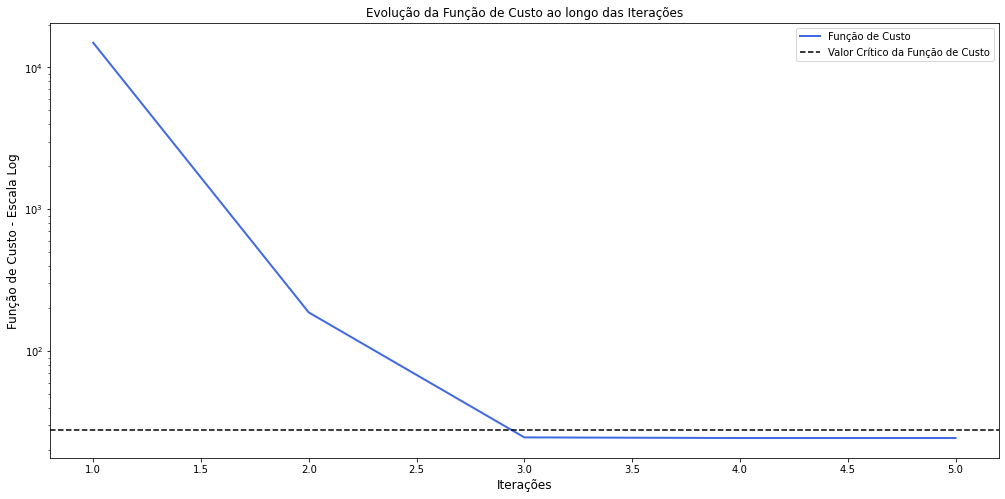

In [27]:
 plt.figure(figsize = (17, 8))
 iteracoes = range(1, len(J_list)+1)
 plt.plot(iteracoes, J_list, color = 'royalblue', lw = 2, label = 'Função de Custo')
 plt.axhline(J_critical, color = 'black', ls = '--', label = 'Valor Crítico da Função de Custo')
 plt.yscale('log')
 plt.legend()
 plt.xlabel('Iterações', fontsize = 12)
 plt.ylabel('Função de Custo - Escala Log', fontsize = 12)
 plt.title('Evolução da Função de Custo ao longo das Iterações', fontsize = 12)
 plt.show()

Módulo da Tensão e Ângulo estimados pelo EE. A Barra 1 foi considerada como referência ângular do sistema

In [28]:
pd.options.display.float_format = "{:,.3f}".format
State_dataframe

,Voltage Mag.,Angle [Deg]
1,1.059,0.000
2,1.044,-2.634
3,1.011,-7.322
4,1.042,-5.883
5,1.046,-5.009
6,1.073,-9.124
7,1.068,-8.190
8,1.089,-8.147
9,1.065,-9.272
10,1.063,-9.396


Medidas Estimadas, Erro e Erro Normalizado para o sistema 14 barras do IEEE. Pode-se notar que todos os erros encontram-se abaixo do limiar padrão de 3. Assim, não há motivo para acreditar que há problemas no processo de medição.

OBS: Uma coloração divergente foi utilizada na coluna de erro normalizado. Tendo erros mais altos tendendo a cor vermelho e erros mais baixos tendendo a cor azul.

In [29]:
import seaborn as sns
cmap=sns.diverging_palette(250, 5, as_cmap=True)
data_SE.style.background_gradient(cmap, subset=['Error_Normalize'])

,Meansured Type,Location,Meansured,Meansured Estimated,Error,Error_Normalize
0,P_inj,1,1.266000,1.288484,-0.022484,2.237543
1,P_inj,2,0.156400,0.165357,-0.008957,1.798094
2,P_flow,"(2, 1)",-0.861300,-0.847507,-0.013793,0.919651
3,P_flow,"(1, 5)",0.435400,0.428190,0.007210,0.532682
4,P_flow,"(2, 3)",0.462800,0.456335,0.006465,0.520301
5,P_flow,"(2, 4)",0.340600,0.323045,0.017555,1.371557
6,P_flow,"(5, 2)",-0.243900,-0.230285,-0.013615,1.131389
7,P_flow,"(3, 4)",-0.198200,-0.195457,-0.002743,0.361335
8,P_flow,"(4, 5)",-0.388200,-0.389885,0.001685,0.473014
9,P_flow,"(7, 4)",-0.207900,-0.214161,0.006261,0.869415


<h3> Teste da Retirada de Medidas Pertencentes a Conjuntos Críticos </h3>

Retirando-se a medida de fluxo de potência ativa entre as barras 9-10, a qual pertencia a um conjunto crítico, todas as medidas daquele conjunto tornam-se críticas.

In [30]:
meansured_file_cmeans = 'Meansured_data_XIV_bus_cset.xlsx'
_, criticality_data, _, _, _, _ = state_estimation(line_params = line_params, meansured_file = meansured_file_cmeans)

In [31]:
criticality_data.dropna().sort_values(by= 'Cricality')

,Meansured_Type,Location,Cricality
9,P_flow,"(7, 4)",CSets_1
16,P_flow,"(9, 7)",CSets_1
11,P_flow,"(5, 6)",CSets_2
17,P_flow,"(14, 9)",CSets_2
20,P_flow,"(13, 14)",CSets_2
13,P_flow,"(6, 12)",CSets_3
19,P_flow,"(13, 12)",CSets_3
12,P_flow,"(11, 6)",Critical Meansured
15,P_flow,"(7, 8)",Critical Meansured
18,P_flow,"(10, 11)",Critical Meansured


<h3> Teste da Detecção e Identificação de Medidas com Erros Grosseiros </h3>

Foi modificado o valor de $P_{15}$ para $P_{15} = 0.725$. O que representa um erro na medida de 20 vezes o desvio padrão. Sendo, portanto, considerado um erro grosseiro. Este teste irá verificar a capacidade do programa detectar o erro nesta medida.

In [32]:
meansured_wrong = 'Meansured_data_XIV_bus_wrong.xlsx'
y_bus_matrix, criticality_data, J_list, J_critical, State_dataframe, data_SE = state_estimation(line_params = line_params, meansured_file = meansured_wrong)

Pode-se notar que o valor de $J(x)$ está acima do valor crítico. Desta forma, há motivos para se rejeitar a hipótese nula $H_{0}$ de que não há medidas ruins utilizando $\alpha = 0.05$.

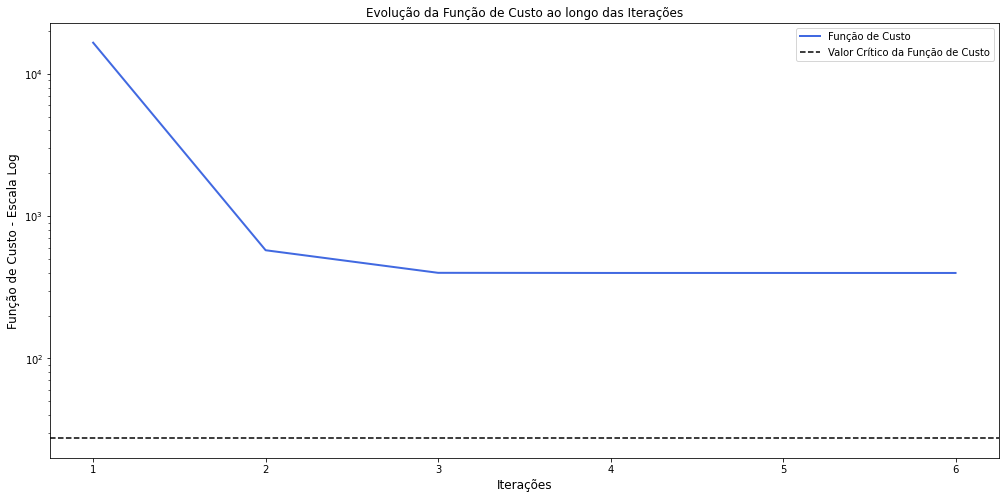

In [33]:
 plt.figure(figsize = (17, 8))
 iteracoes = range(1, len(J_list)+1)
 plt.plot(iteracoes, J_list, color = 'royalblue', lw = 2, label = 'Função de Custo')
 plt.axhline(J_critical, color = 'black', ls = '--', label = 'Valor Crítico da Função de Custo')
 plt.yscale('log')
 plt.legend()
 plt.xlabel('Iterações', fontsize = 12)
 plt.ylabel('Função de Custo - Escala Log', fontsize = 12)
 plt.title('Evolução da Função de Custo ao longo das Iterações', fontsize = 12)
 plt.show()

<h3> Teste - Medida com Erro Grosseiro </h3>

Verificando os resíduos normalizados pode-se notar que o maior resíduo está na medida $P_{15}$. Sendo assim, o estimador pode determinar corretamente o erro na medida.

In [34]:
data_SE.style.background_gradient(cmap, subset=['Error_Normalize'])

,Meansured Type,Location,Meansured,Meansured Estimated,Error,Error_Normalize
0,P_inj,1,1.266000,1.362147,-0.096147,9.586303
1,P_inj,2,0.156400,0.187691,-0.031291,6.286040
2,P_flow,"(2, 1)",-0.861300,-0.884052,0.022752,1.517423
3,P_flow,"(1, 5)",0.725228,0.464246,0.260981,19.287602
4,P_flow,"(2, 3)",0.462800,0.457451,0.005349,0.430291
5,P_flow,"(2, 4)",0.340600,0.349220,-0.008620,0.673506
6,P_flow,"(5, 2)",-0.243900,-0.261039,0.017139,1.423738
7,P_flow,"(3, 4)",-0.198200,-0.171767,-0.026433,3.488240
8,P_flow,"(4, 5)",-0.388200,-0.368993,-0.019207,5.395679
9,P_flow,"(7, 4)",-0.207900,-0.215102,0.007202,1.000281


<h3> Teste da Detecção de Medidas com Erros Grosseiros em Conjuntos Críticos </h3>

Foram modificados os valore de $P_{(11, 6)}$, $P_{(9, 10)}$ e $P_{(10, 11)}$ para $P_{(11, 6)} = -0.265$, $P_{(9, 10)} = 0.269$, $P_{(10, 11)} = -0.255$. O que representa um erro nas medidas de 20 vezes o desvio padrão. Sendo, portanto, considerado um erro grosseiro. Este teste irá verificar a capacidade do programa detectar o erro em multiplas medidas.

In [35]:
meansured_wrong = 'Meansured_data_XIV_bus_wrong_cset.xlsx'
y_bus_matrix, criticality_data, J_list, J_critical, State_dataframe, data_SE = state_estimation(line_params = line_params, meansured_file = meansured_wrong)

Após a convergência do processo o valor de $J(x)$ encontra-se maior que o limiar estabelecido para este sistema. Indicando assim a presença de erros grosseiros.

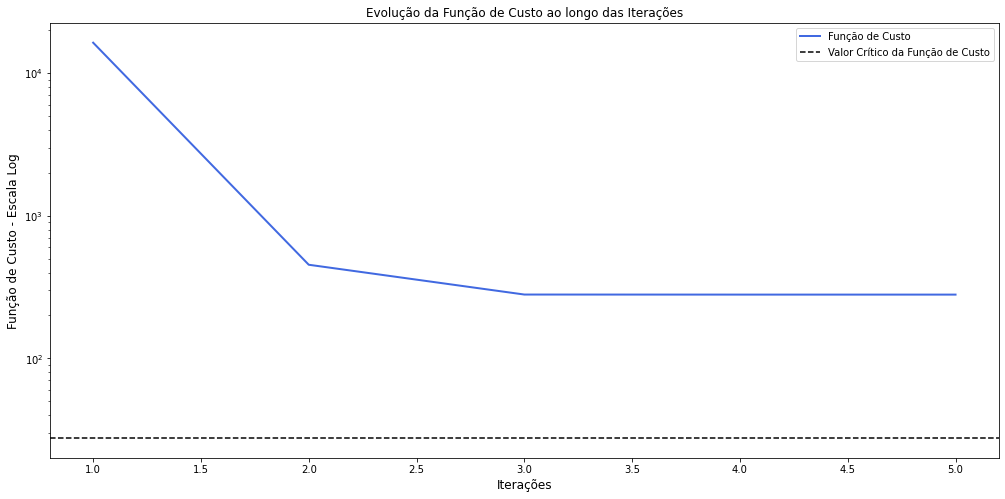

In [36]:
 plt.figure(figsize = (17, 8))
 iteracoes = range(1, len(J_list)+1)
 plt.plot(iteracoes, J_list, color = 'royalblue', lw = 2, label = 'Função de Custo')
 plt.axhline(J_critical, color = 'black', ls = '--', label = 'Valor Crítico da Função de Custo')
 plt.yscale('log')
 plt.legend()
 plt.xlabel('Iterações', fontsize = 12)
 plt.ylabel('Função de Custo - Escala Log', fontsize = 12)
 plt.title('Evolução da Função de Custo ao longo das Iterações', fontsize = 12)
 plt.show()

Como pode-se obseervar na tabela abaixo todos os resíduos das medidas críticas estão acima de 3 e possuem valores próximos.

In [37]:
data_SE.style.background_gradient(cmap, subset=['Error_Normalize'])

,Meansured Type,Location,Meansured,Meansured Estimated,Error,Error_Normalize
0,P_inj,1,1.266000,1.288268,-0.022268,2.215971
1,P_inj,2,0.156400,0.165458,-0.009058,1.818163
2,P_flow,"(2, 1)",-0.861300,-0.848534,-0.012766,0.851150
3,P_flow,"(1, 5)",0.435400,0.426917,0.008483,0.626772
4,P_flow,"(2, 3)",0.462800,0.457404,0.005396,0.434272
5,P_flow,"(2, 4)",0.340600,0.325116,0.015484,1.209765
6,P_flow,"(5, 2)",-0.243900,-0.228318,-0.015582,1.294952
7,P_flow,"(3, 4)",-0.198200,-0.194581,-0.003619,0.476782
8,P_flow,"(4, 5)",-0.388200,-0.406980,0.018780,5.272054
9,P_flow,"(7, 4)",-0.207900,-0.262241,0.054341,7.539376


<h3> Teste da Influência de Parâmetros Erroneos no Resíduo Normalizado </h3>

Neste teste os parâmetros de admitância relacionados a barra 2 foram alterados. O que ocorrerá é uma falsa impressão de que há medidas com erros grosseiros quando na verdade deve os parâmetros que causam erros no processo de estimação de estado. Os valores adotados para este teste foram os seguntes:
$$X_{1,2} = 0.090$$
$$X_{2,3} = 0.340$$
$$X_{2,4} = 0.244$$
$$X_{2,5} = 0.317$$

In [38]:
line_wrong = 'Dados_linha_XIV_barras_erro_barra_2.xlsx'
y_bus_matrix, criticality_data, J_list, J_critical, State_dataframe, data_SE = state_estimation(line_params = line_wrong, meansured_file = meansured_file)

Como pode-se observar abaixo o processo convergiu e resultou num valor de $J(x)$ acima do limiar estabelecido.

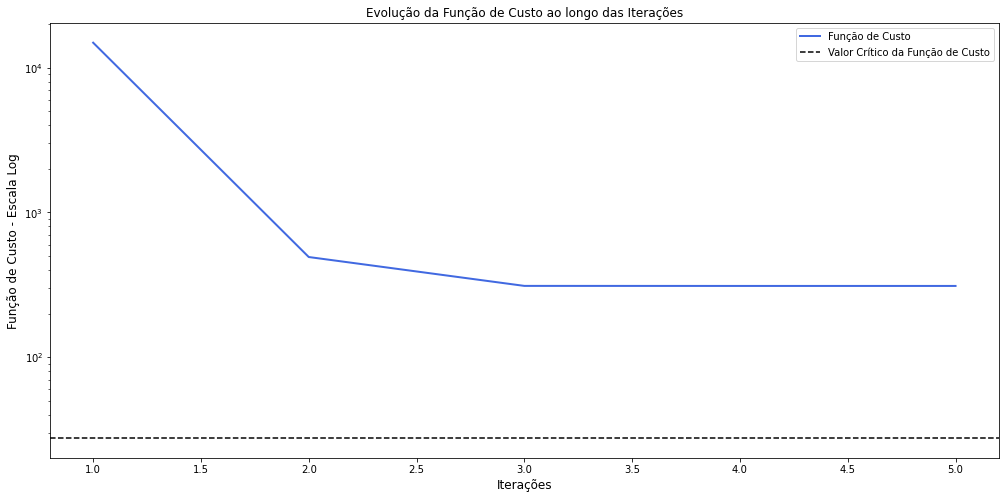

In [39]:
 plt.figure(figsize = (17, 8))
 iteracoes = range(1, len(J_list)+1)
 plt.plot(iteracoes, J_list, color = 'royalblue', lw = 2, label = 'Função de Custo')
 plt.axhline(J_critical, color = 'black', ls = '--', label = 'Valor Crítico da Função de Custo')
 plt.yscale('log')
 plt.legend()
 plt.xlabel('Iterações', fontsize = 12)
 plt.ylabel('Função de Custo - Escala Log', fontsize = 12)
 plt.title('Evolução da Função de Custo ao longo das Iterações', fontsize = 12)
 plt.show()

Os residuos normalizados também estão superiores a 3, neste caso poderia se suspeitar erroneamente de parâmetros com erros grosseiros.

In [40]:
data_SE.style.background_gradient(cmap, subset=['Error_Normalize'])

,Meansured Type,Location,Meansured,Meansured Estimated,Error,Error_Normalize
0,P_inj,1,1.266000,1.291470,-0.025470,2.558429
1,P_inj,2,0.156400,0.148190,0.008210,1.610086
2,P_flow,"(2, 1)",-0.861300,-0.713464,-0.147836,9.548050
3,P_flow,"(1, 5)",0.435400,0.568971,-0.133571,10.287536
4,P_flow,"(2, 3)",0.462800,0.349484,0.113316,8.336439
5,P_flow,"(2, 4)",0.340600,0.317647,0.022953,1.771602
6,P_flow,"(5, 2)",-0.243900,-0.192446,-0.051454,4.104606
7,P_flow,"(3, 4)",-0.198200,-0.250874,0.052674,10.040389
8,P_flow,"(4, 5)",-0.388200,-0.409873,0.021673,7.614646
9,P_flow,"(7, 4)",-0.207900,-0.213213,0.005313,0.737952


In [2]:
bad_data = pd.read_excel('dados_residuos_dia_corromp_aleatorio_not_all.xlsx')
bad_data.sample(5)

,Unnamed: 0,Meansured Type,Location,Meansured,Meansured Estimated,Error,Error_Normalize,Instante
2891,5,P_inj,8,0.0000,-0.000009,0.000009,0.001124,38
599,53,Q_flow,"(3, 4)",-0.1312,-0.132744,0.001544,0.166343,8
2453,35,P_flow,"(12, 6)",-0.0306,-0.030559,-0.000041,-0.005766,32
14802,60,Q_flow,"(12, 6)",-0.0249,-0.023880,-0.001020,-0.141139,190
16057,67,Q_flow,"(11, 10)",0.0291,0.029867,-0.000767,-0.091947,206


In [15]:
# med_type = bad_data['Meansured Type'].unique()
# loc = bad_data['Location'].unique()
from scipy.stats import  shapiro
data = bad_data.groupby(['Meansured Type','Location']).size().reset_index().drop(columns = [0])
col = ['Meansured Type', 'Location', 'Statistic', 'P-Value', 'Mean', 'Std', 'Max', 'Ultapassa-Lim-3']
test = pd.DataFrame(columns = col)
for row in data.iterrows():
    group = row[1]
    med = group['Meansured Type']
    loc = group['Location']
    test_data = bad_data[(bad_data['Meansured Type'] == med) & (bad_data['Location'] == loc)]['Error_Normalize']
    sh = shapiro(test_data.values.ravel())
    mean = test_data.mean()
    std = test_data.std()
    maior = np.max(np.abs(test_data))
    ultrapassa_lim = np.sum(test_data > 3)
    test = test.append(dict(zip(col, (med, loc, sh[0], sh[1], mean, std, maior, ultrapassa_lim))), ignore_index=True)

In [21]:
test.to_excel('Novo_teste_Parametros_Corrigidos.xlsx')